In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [39]:
# Importando banco de dados
base = pd.read_csv("br_mme_consumo_energia_eletrica_uf.csv")

### Análise inicial do dataset

In [40]:
base.shape

(38880, 6)

In [41]:
base.head(5)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451
2,2004,1,PR,Total,NaN,1596274
3,2004,1,RS,Total,NaN,1780912
4,2004,1,GO,Total,NaN,630624


In [42]:
base.tail(5)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
38875,2023,12,BA,Residencial,5932740.0,718461
38876,2023,12,PA,Residencial,2614106.0,478726
38877,2023,12,AC,Residencial,245699.0,58301
38878,2023,12,RN,Residencial,1390080.0,210119
38879,2023,12,SC,Residencial,2719791.0,655389


In [49]:
base.dtypes

ano                      int64
mes                      int64
sigla_uf                object
tipo_consumo            object
numero_consumidores    float64
consumo                  int64
dtype: object

In [51]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38880 entries, 0 to 38879
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  38880 non-null  int64  
 1   mes                  38880 non-null  int64  
 2   sigla_uf             38880 non-null  object 
 3   tipo_consumo         38880 non-null  object 
 4   numero_consumidores  25920 non-null  float64
 5   consumo              38880 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ MB


In [43]:
base.isnull().sum()

ano                        0
mes                        0
sigla_uf                   0
tipo_consumo               0
numero_consumidores    12960
consumo                    0
dtype: int64

Podemos perceber que a base no geral é limpa, entretanto, existe uma porção dos dados com a informação do número de consumidores faltando, isso pode acontecer por diversas razões. Uma possível hipótese é que esse dado foi inserido no modelo depois de um tempo de sua criação, resultando nessa lacuna entre 2004 e uma parte de 2005

In [44]:
base_drop = base.dropna()

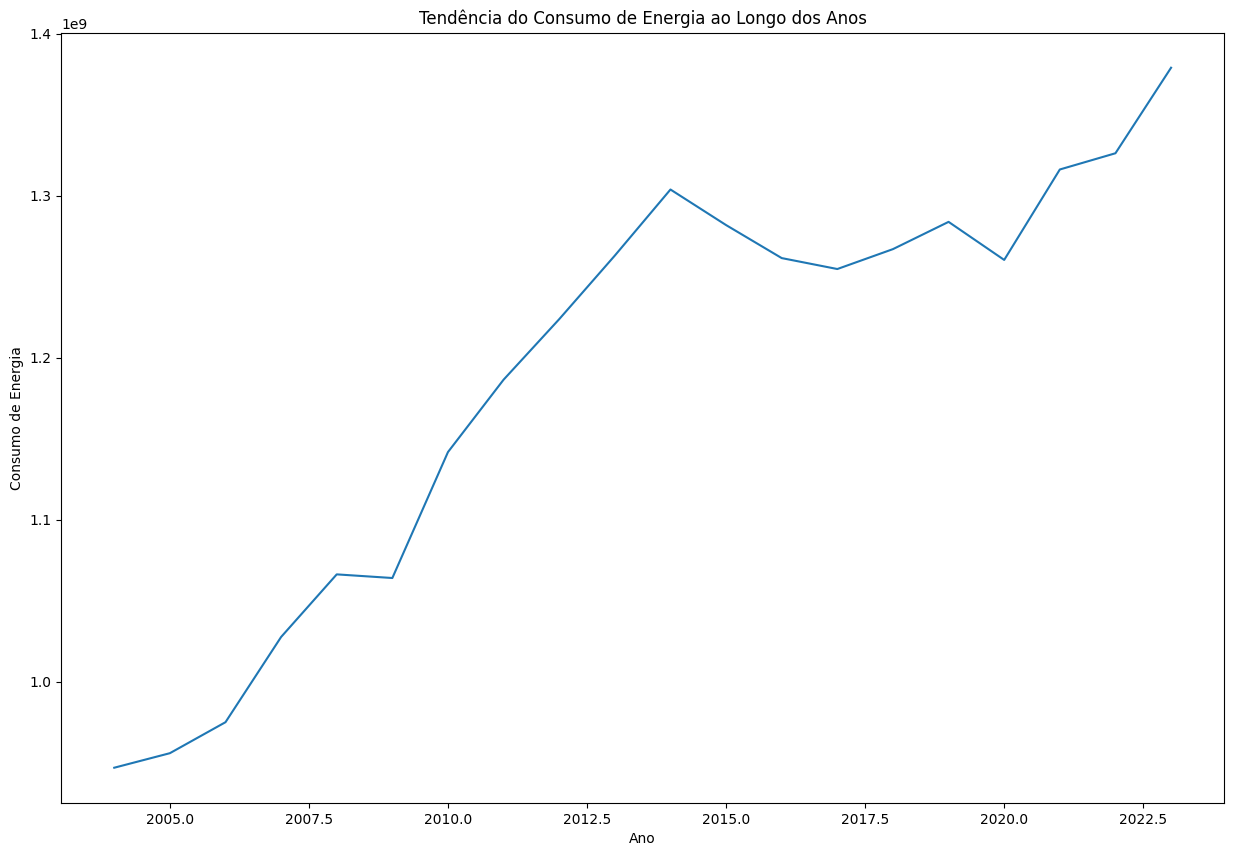

In [45]:
# Agrupar dados por ano e somar o consumo de energia
ano_consumo = base.groupby('ano')['consumo'].sum()

# Decomposição da série temporal
decomposicao = sm.tsa.seasonal_decompose(ano_consumo, model='additive', period=1)

# Plotando a decomposição (tendência)
plt.figure(figsize=(15, 10))
decomposicao.trend.plot(title='Tendência do Consumo de Energia ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia')
plt.show()


Ao observarmos o gráfico acima, é possível perceber que o consumo de energia vem aumentando considerávelmente nos últimos anos, isso se deve pela crescente onda tecnológica e revolução digital que tornou os computadores e diversas outras máquinas mais presentes no mundo. 

Outro aspecto interessante que pode ser observado é o aumento súbito entre 2020 e 2022 desencadeado principalmente pela pandemia do COVID-19 que forçou muitas pessoas a trabalharem em casa e passarem a maior parte do tempo em isolamento, o que resultou em um maior uso de dispositivos eletrônicos como computadores, celulares, videogames e televisões.

Também vale ressaltar que com a evolução e a popularização das inteligências artificiais esse gráfico continue subindo, uma vez que o treinamento e o uso de modelos de aprendizado de máquina exige um grande poder computacional que por sua vez consome um volume considerável de energia.

In [47]:
X = ano_consumo.index.values.reshape(-1, 1)  # Ano como variável independente
y = ano_consumo.values  # Consumo como variável dependente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {round(mae,2)}')
print(f'RMSE: {round(rmse,2)}')
print(f'R²: {round(r2,2)}')

MAE: 48222694.03
RMSE: 52174300.56
R²: 0.91


c:\Users\rcm20\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [54]:
base["tipo_consumo"].value_counts()

tipo_consumo
Total          6480
Cativo         6480
Outros         6480
Comercial      6480
Industrial     6480
Residencial    6480
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

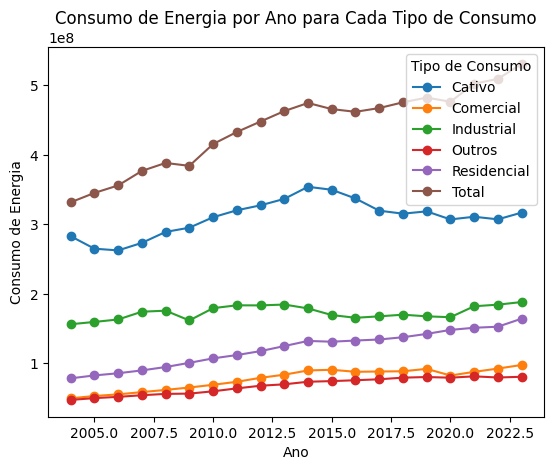

In [48]:
ano_tipo_consumo = base.groupby(['ano', 'tipo_consumo'])['consumo'].sum().unstack()

plt.figure(figsize=(12, 6))
ano_tipo_consumo.plot(kind='line', marker='o')
plt.title('Consumo de Energia por Ano para Cada Tipo de Consumo')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia')
plt.legend(title='Tipo de Consumo')
plt.show()
